# Sustainable Investing in New York City

Sustainability has become a core principal in businesses desiring the patronage of Millenials and Gen-Xers. When one thinks of sustainability, thoughts of renewable energy and Fair Trade products come to mind. Sustainable homes include using green energy, recycled water, and compostable waste. Sustainable real estate investing follows a similar ethos. It requires that investors not only make a profit, but do so in a way that elevates the community rather than dividing and dispersing it. 

New York City, like many metropoli, has long struggled with displacing long-time residents of neighborhoods when redevelopment occurs. This gentrification too often leads to morally questionable business transactions that benefit real estate developers to the detriment of established residents and only provides high-risk, short-term gains for both building owners and investors.

This analysis will demonstrate the long-term growth potential of such sustainable investing. 

# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import pandas.tseries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA

df = pd.read_csv('zillow_data.csv')
df.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [3]:
nyc_df = df[df['Metro']=='New York']
nyc_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
12,62087,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,...,1022600,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600
13,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,...,767300,777300,788800,793900,796000,799700,806600,810600,813400,816200
20,61625,10011,New York,NY,New York,New York,21,NaN,NaN,NaN,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14513,62305,11958,Peconic,NY,New York,Suffolk,14514,177400.0,177200.0,176900.0,...,673600,679300,675900,671400,684900,699900,700100,693200,687200,678400
14530,61831,10518,Lewisboro,NY,New York,Westchester,14531,341700.0,339700.0,337600.0,...,596000,603600,610100,617600,607200,587000,570100,554400,546700,556700
14535,62218,11739,Islip,NY,New York,Suffolk,14536,235000.0,235700.0,236500.0,...,527200,510200,495800,488400,485700,487100,487100,487900,486100,482900
14567,61948,10964,Orangetown,NY,New York,Rockland,14568,261200.0,262400.0,263400.0,...,631700,629800,624000,622300,622400,624300,625100,628000,634100,643000


# Step 2: Data Preprocessing

In [4]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [5]:
get_datetimes(nyc_df)

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [6]:
nyc_df.isnull().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64

In [7]:
nyc_df['2014-06'][:5]

6      324200.0
10     638900.0
12     794500.0
13     577500.0
20    9817300.0
Name: 2014-06, dtype: float64

In [8]:
nyc_df.isna().any()[lambda x: x]
unique, counts = np.unique(nyc_df['RegionName'], return_counts=True)
dict(zip(unique, counts))

{7001: 1,
 7002: 1,
 7003: 1,
 7004: 1,
 7005: 1,
 7006: 1,
 7008: 1,
 7009: 1,
 7010: 1,
 7011: 1,
 7012: 1,
 7013: 1,
 7014: 1,
 7016: 1,
 7020: 1,
 7021: 1,
 7022: 1,
 7023: 1,
 7024: 1,
 7026: 1,
 7027: 1,
 7028: 1,
 7029: 1,
 7030: 1,
 7031: 1,
 7032: 1,
 7033: 1,
 7034: 1,
 7035: 1,
 7036: 1,
 7039: 1,
 7040: 1,
 7041: 1,
 7042: 1,
 7043: 1,
 7044: 1,
 7045: 1,
 7046: 1,
 7047: 1,
 7050: 1,
 7052: 1,
 7054: 1,
 7055: 1,
 7057: 1,
 7058: 1,
 7059: 1,
 7060: 1,
 7062: 1,
 7063: 1,
 7064: 1,
 7065: 1,
 7066: 1,
 7067: 1,
 7068: 1,
 7069: 1,
 7070: 1,
 7071: 1,
 7072: 1,
 7073: 1,
 7074: 1,
 7075: 1,
 7076: 1,
 7077: 1,
 7078: 1,
 7079: 1,
 7080: 1,
 7081: 1,
 7082: 1,
 7083: 1,
 7086: 1,
 7087: 1,
 7088: 1,
 7090: 1,
 7092: 1,
 7093: 1,
 7094: 1,
 7095: 1,
 7103: 1,
 7104: 1,
 7105: 1,
 7106: 1,
 7107: 1,
 7109: 1,
 7110: 1,
 7114: 1,
 7201: 1,
 7202: 1,
 7203: 1,
 7204: 1,
 7205: 1,
 7206: 1,
 7208: 1,
 7302: 1,
 7305: 1,
 7306: 1,
 7307: 1,
 7401: 1,
 7403: 1,
 7405: 1,
 7407: 1,


In [9]:
nyc_df.fillna(value=0)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
12,62087,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,...,1022600,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600
13,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,...,767300,777300,788800,793900,796000,799700,806600,810600,813400,816200
20,61625,10011,New York,NY,New York,New York,21,0.0,0.0,0.0,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14513,62305,11958,Peconic,NY,New York,Suffolk,14514,177400.0,177200.0,176900.0,...,673600,679300,675900,671400,684900,699900,700100,693200,687200,678400
14530,61831,10518,Lewisboro,NY,New York,Westchester,14531,341700.0,339700.0,337600.0,...,596000,603600,610100,617600,607200,587000,570100,554400,546700,556700
14535,62218,11739,Islip,NY,New York,Suffolk,14536,235000.0,235700.0,236500.0,...,527200,510200,495800,488400,485700,487100,487100,487900,486100,482900
14567,61948,10964,Orangetown,NY,New York,Rockland,14568,261200.0,262400.0,263400.0,...,631700,629800,624000,622300,622400,624300,625100,628000,634100,643000


As we can see from the above list of zipcodes, there is only one property represented per zipcode. This ensures a balanced analysis, as there is an even number of properties across zipcodes. The downside is that a single property may not be a true representation of an entire zipcode.

# Step 3: EDA and Visualization

As we saw above, some of the zip codes were represented by buildings that were not yet constructed in April 1996 (hence the null values). The next step is to find the top five properties with the largest difference between their original value and their respective values in April 2018. 

In [ ]:
labels = []
for i in range(len((df.RegionID.unique()))):
    label = f'City:{df[i][0].City.values[0]},{df[i][0].State.values[0]}' +'   '+ f'Zipcode:{str(df[i][0].RegionName.values[0])}'
    labels.append(label)

## 3A: Local + Proven
These would be the real-estate equivalents of Google or Amazon--investments that have had excellent growth and are expected to continue growing.

In [11]:
top_five_df_1996 = []
for i in nyc_df:
    nyc_df_1996 = (nyc_df['2018-04'] - nyc_df['1996-04'])/ nyc_df['1996-04']
    top_five_df_1996.append(nyc_df_1996)

nyc_df_1996.nlargest(5)

117     11.189940
1155    10.535523
475      9.942505
191      9.403061
106      8.941958
dtype: float64

In [12]:
top_five_df_2005 = []
for i in nyc_df:
    nyc_df_2005 = (nyc_df['2018-04'] - nyc_df['2005-04'])/ nyc_df['2005-04']
    top_five_df_2005.append(nyc_df_2005)

nyc_df_2005.nlargest(5)

475     2.492899
117     2.372871
1155    2.268325
156     2.166136
1534    2.048191
dtype: float64

In [14]:
top_five_df_2014 = []
for i in nyc_df:
    nyc_df_2014 = (nyc_df['2018-04'] - nyc_df['2014-04'])/ nyc_df['2014-04']
    top_five_df_2014.append(nyc_df_2014)

nyc_df_2014.nlargest(15)

660     1.063162
7007    1.012085
475     0.928003
1737    0.922617
190     0.880627
191     0.832927
1155    0.805223
8495    0.761101
70      0.747542
2043    0.729818
519     0.718695
1065    0.717151
3334    0.712431
319     0.705547
6330    0.639090
dtype: float64

In [40]:
top_nyc_df = nyc_df[(nyc_df.SizeRank==661) | (nyc_df.SizeRank==7008) | (nyc_df.SizeRank==476) | (nyc_df.SizeRank==1738) | (nyc_df.SizeRank==191)]
top_nyc_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
190,62043,11233,New York,NY,New York,Kings,191,124500.0,124500.0,124500.0,...,788800,788000,787100,797100,808400,809800,800800,806100,829200,852300
475,62027,11216,New York,NY,New York,Kings,476,146100.0,146600.0,147200.0,...,1452000,1506100,1553100,1567700,1559700,1545700,1540200,1553600,1578400,1598700
660,60643,7306,Jersey City,NJ,New York,Hudson,661,111400.0,111100.0,110900.0,...,465400,469800,475900,484000,495800,506700,510000,515300,531900,545500
1737,60644,7307,Jersey City,NJ,New York,Hudson,1738,114300.0,114300.0,114400.0,...,439500,449000,458300,468100,478200,487300,496000,510600,531900,546600
7007,62310,11963,Noyack,NY,New York,Suffolk,7008,230300.0,230800.0,231500.0,...,1591400,1600300,1599200,1608000,1632200,1679800,1736600,1749800,1727300,1714900


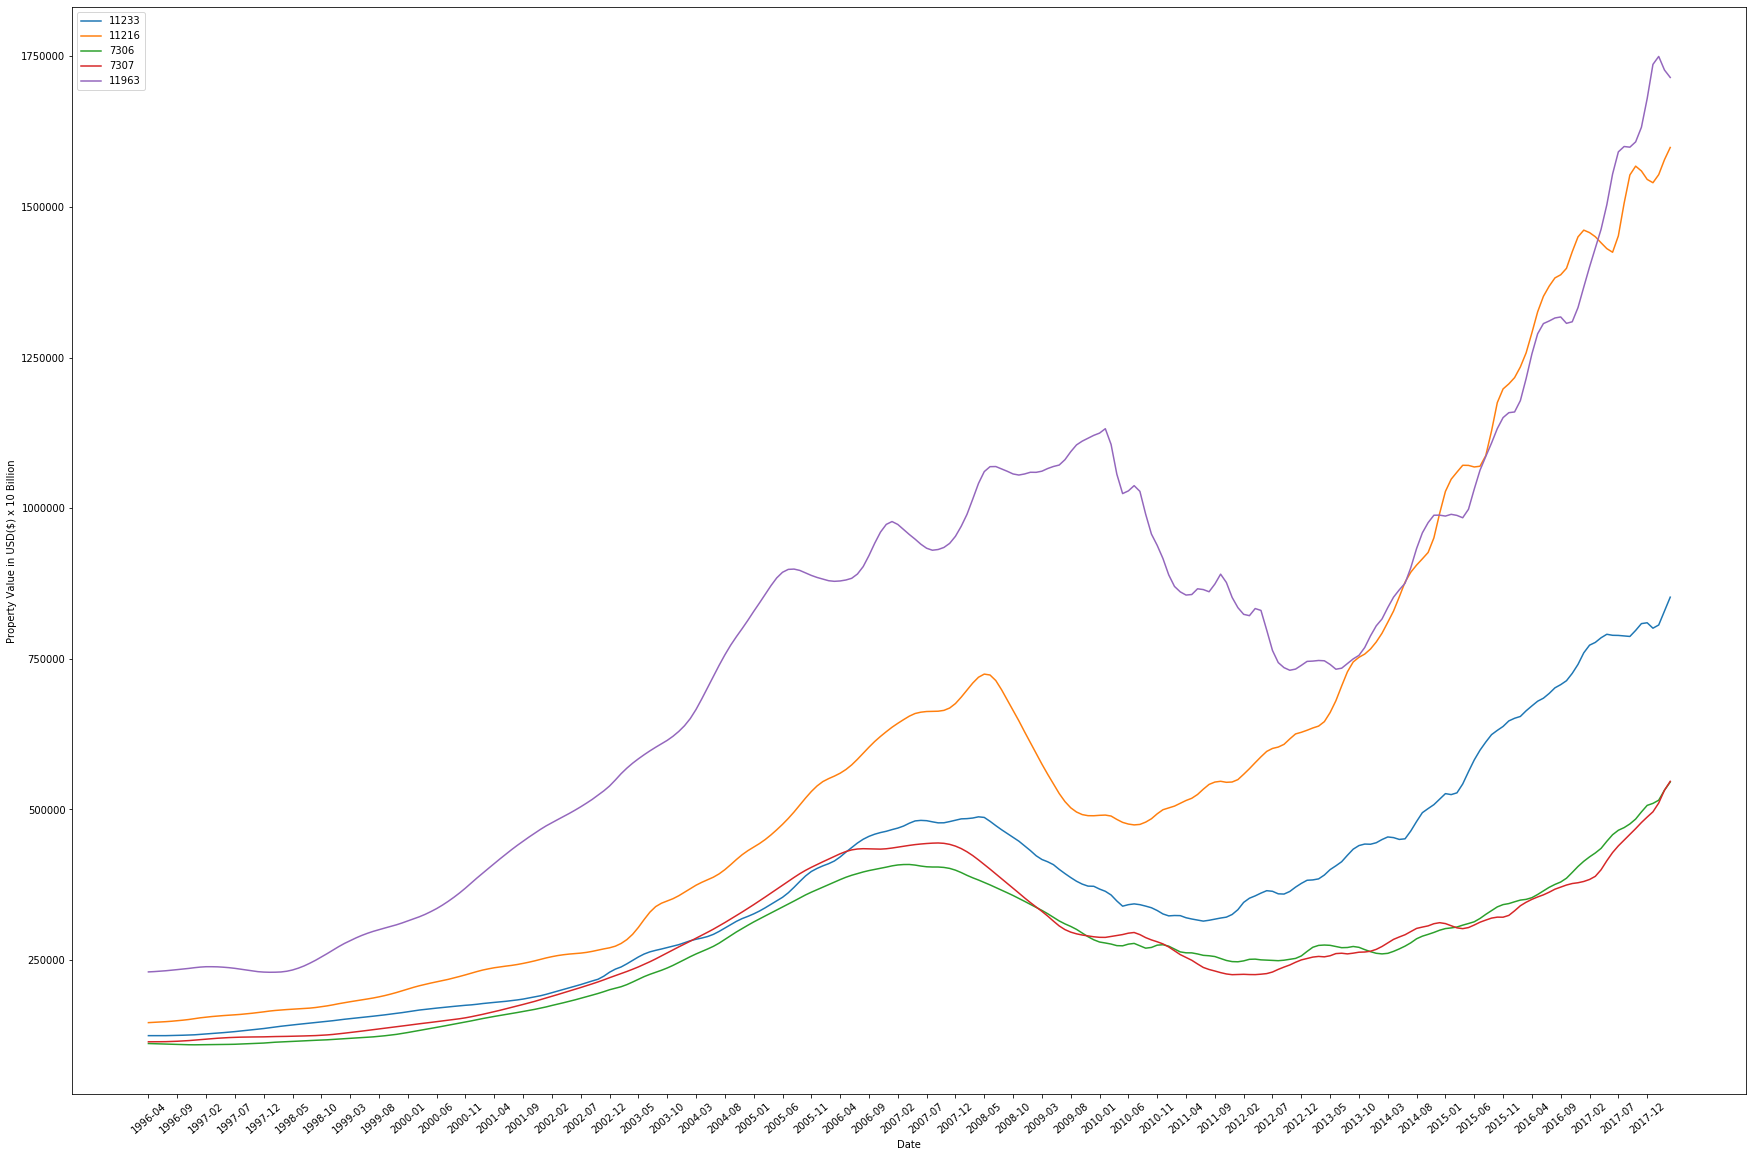

In [46]:
ind_df = (top_nyc_df.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']))
plt.figure(figsize=(30, 20))
plt.xlabel('Date')
plt.xticks(np.arange(0, 265, step=5), rotation=40)
plt.ylabel('Property Value in USD($)')
plt.plot(ind_df.T)
plt.legend(top_nyc_df['RegionName'], loc='upper left')
plt.show()

## 3B: Local + Potential
These would be the real-estate equivalents of "junk" stocks--stocks that have had negative or low gains and who have the potential for being at their lowest, or bargain price for the time.

In [47]:
nyc_df_1996.nsmallest(5)

9897     0.405316
9496     0.407243
11815    0.477931
13772    0.497931
13853    0.498168
dtype: float64

In [48]:
nyc_df_2005.nsmallest(5)

5866    -0.344296
13381   -0.340430
10030   -0.339034
9496    -0.310644
8995    -0.309700
dtype: float64

In [49]:
nyc_df_2014.nsmallest(15)

12353   -0.119973
14535   -0.102750
8947    -0.088762
7020    -0.042553
13381   -0.036640
13853   -0.028504
6375    -0.018782
508     -0.018740
7119    -0.018564
9723    -0.017391
12876   -0.016295
12581   -0.013788
10030   -0.012389
4072    -0.002674
14369   -0.002594
dtype: float64

In [50]:
pot_nyc_df = nyc_df[(nyc_df.SizeRank==12354) | (nyc_df.SizeRank==14536) | (nyc_df.SizeRank==8948) | (nyc_df.SizeRank==7021) | (nyc_df.SizeRank==13382)]
pot_nyc_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
7020,62737,12771,Port Jervis,NY,New York,Orange,7021,63100.0,63000.0,62800.0,...,124300,124500,124200,123300,124200,126500,128300,129300,129900,130500
8947,65422,18328,Delaware,PA,New York,Pike,8948,74300.0,74500.0,74600.0,...,123900,125500,127300,128100,127700,126600,127000,128000,128000,127300
12353,60872,7931,Far Hills,NJ,New York,Somerset,12354,627500.0,628800.0,630000.0,...,1102400,1096000,1090900,1084300,1067600,1051900,1045600,1046500,1048200,1048200
13381,61872,10577,Purchase,NY,New York,Westchester,13382,581800.0,585700.0,589600.0,...,1107200,1101700,1084200,1058800,1041500,1041300,1046300,1048100,1050800,1059600
14535,62218,11739,Islip,NY,New York,Suffolk,14536,235000.0,235700.0,236500.0,...,527200,510200,495800,488400,485700,487100,487100,487900,486100,482900


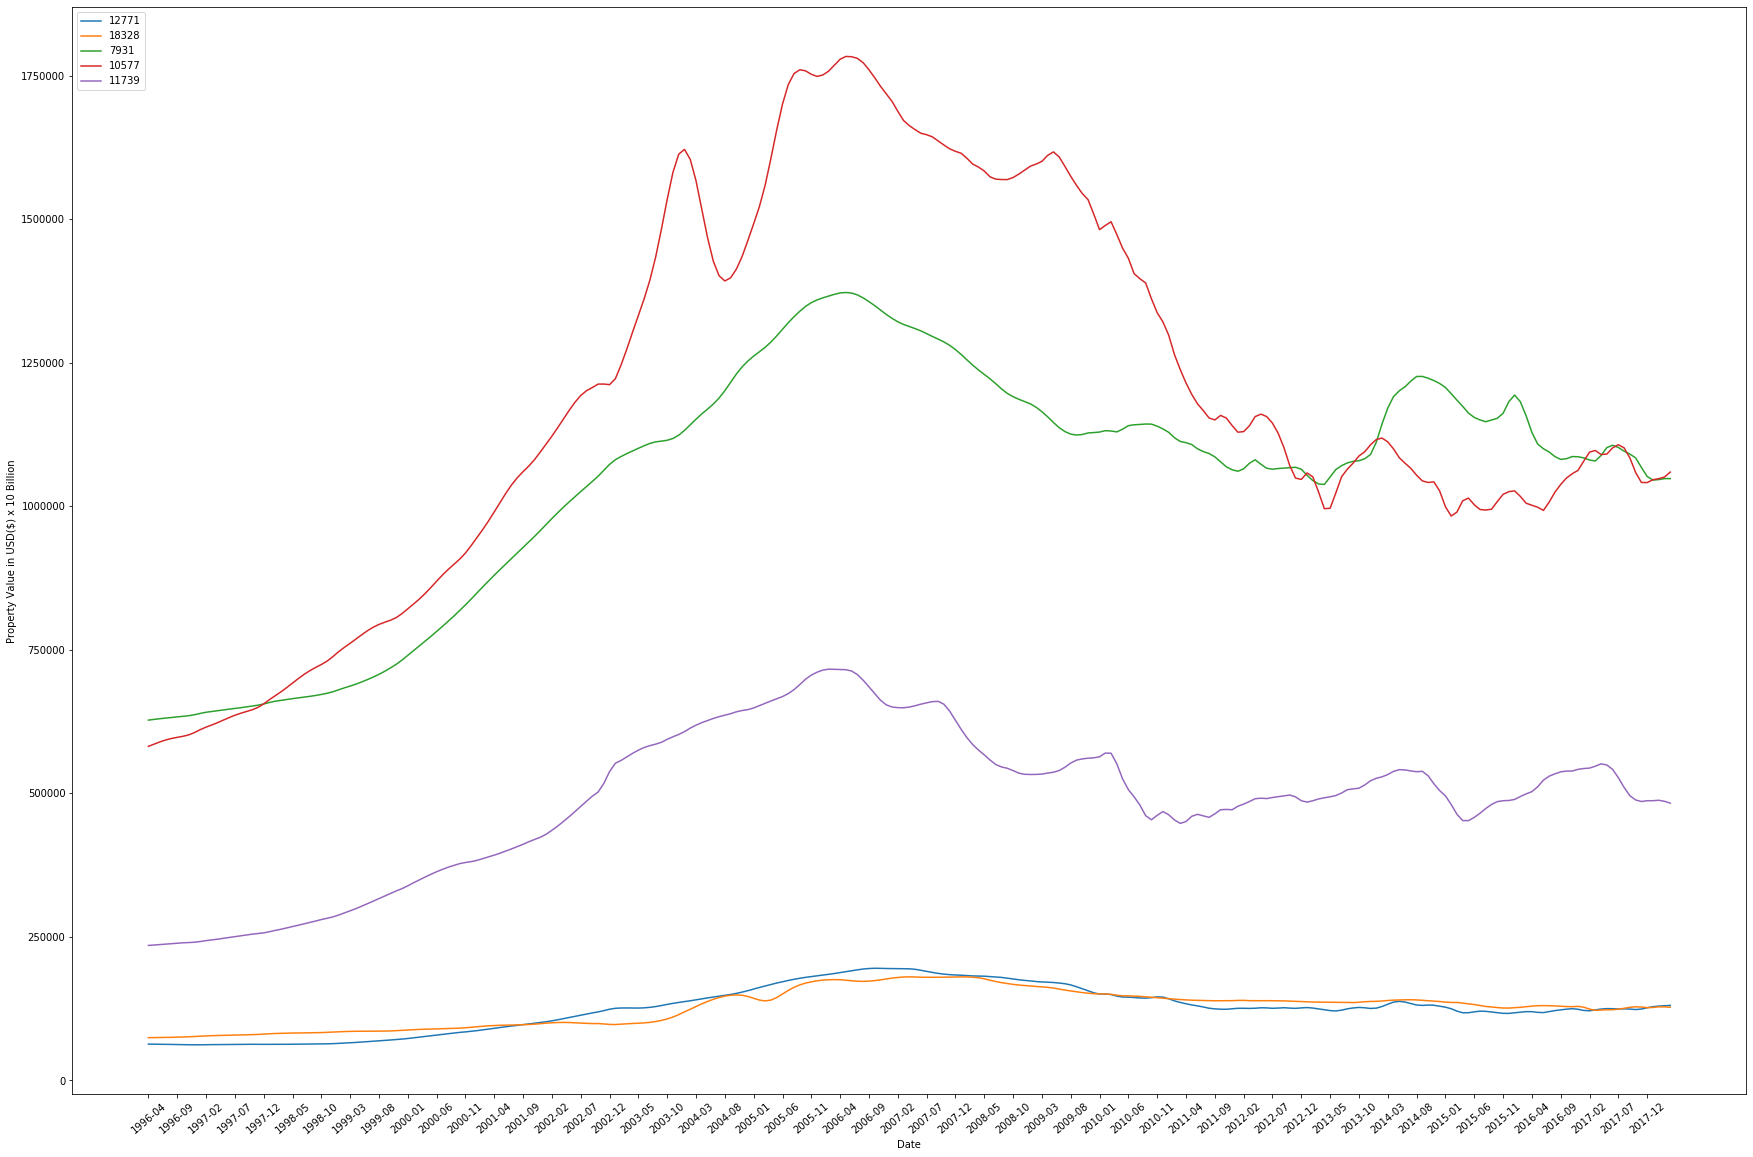

In [51]:
pot_df = (pot_nyc_df.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']))
plt.figure(figsize=(30, 20))
plt.xlabel('Date')
plt.xticks(np.arange(0, 265, step=5), rotation=40)
plt.ylabel('Property Value in USD($)')
plt.plot(pot_df.T)
plt.legend(pot_nyc_df['RegionName'], loc='upper left')
plt.show()

In [52]:
pot_nyc_df_96 = nyc_df[(nyc_df.SizeRank==9898) | (nyc_df.SizeRank==9497) | (nyc_df.SizeRank==11816) | (nyc_df.SizeRank==13773) | (nyc_df.SizeRank==13854)]
pot_nyc_df_96

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
9496,60685,7462,Vernon,NJ,New York,Sussex,9497,135300.0,135000.0,134800.0,...,170600,172200,174000,175000,177700,181600,184900,187700,189800,190400
9897,60663,7422,Highland Lake,NJ,New York,Sussex,9898,120400.0,120400.0,120400.0,...,139700,142600,145700,149900,154600,159600,164500,167900,169100,169200
11815,62690,12594,Dover,NY,New York,Dutchess,11816,145000.0,144500.0,144100.0,...,215700,216900,215800,214600,214000,211000,205400,204400,209900,214300
13772,60659,7418,Vernon Valley,NJ,New York,Sussex,13773,145000.0,144800.0,144500.0,...,214500,207500,199800,198400,201900,206700,209500,210900,214000,217200
13853,61838,10526,Goldens Bridge,NY,New York,Westchester,13854,300300.0,297800.0,295400.0,...,479500,481900,481200,474400,466800,464400,465600,461800,454800,449900


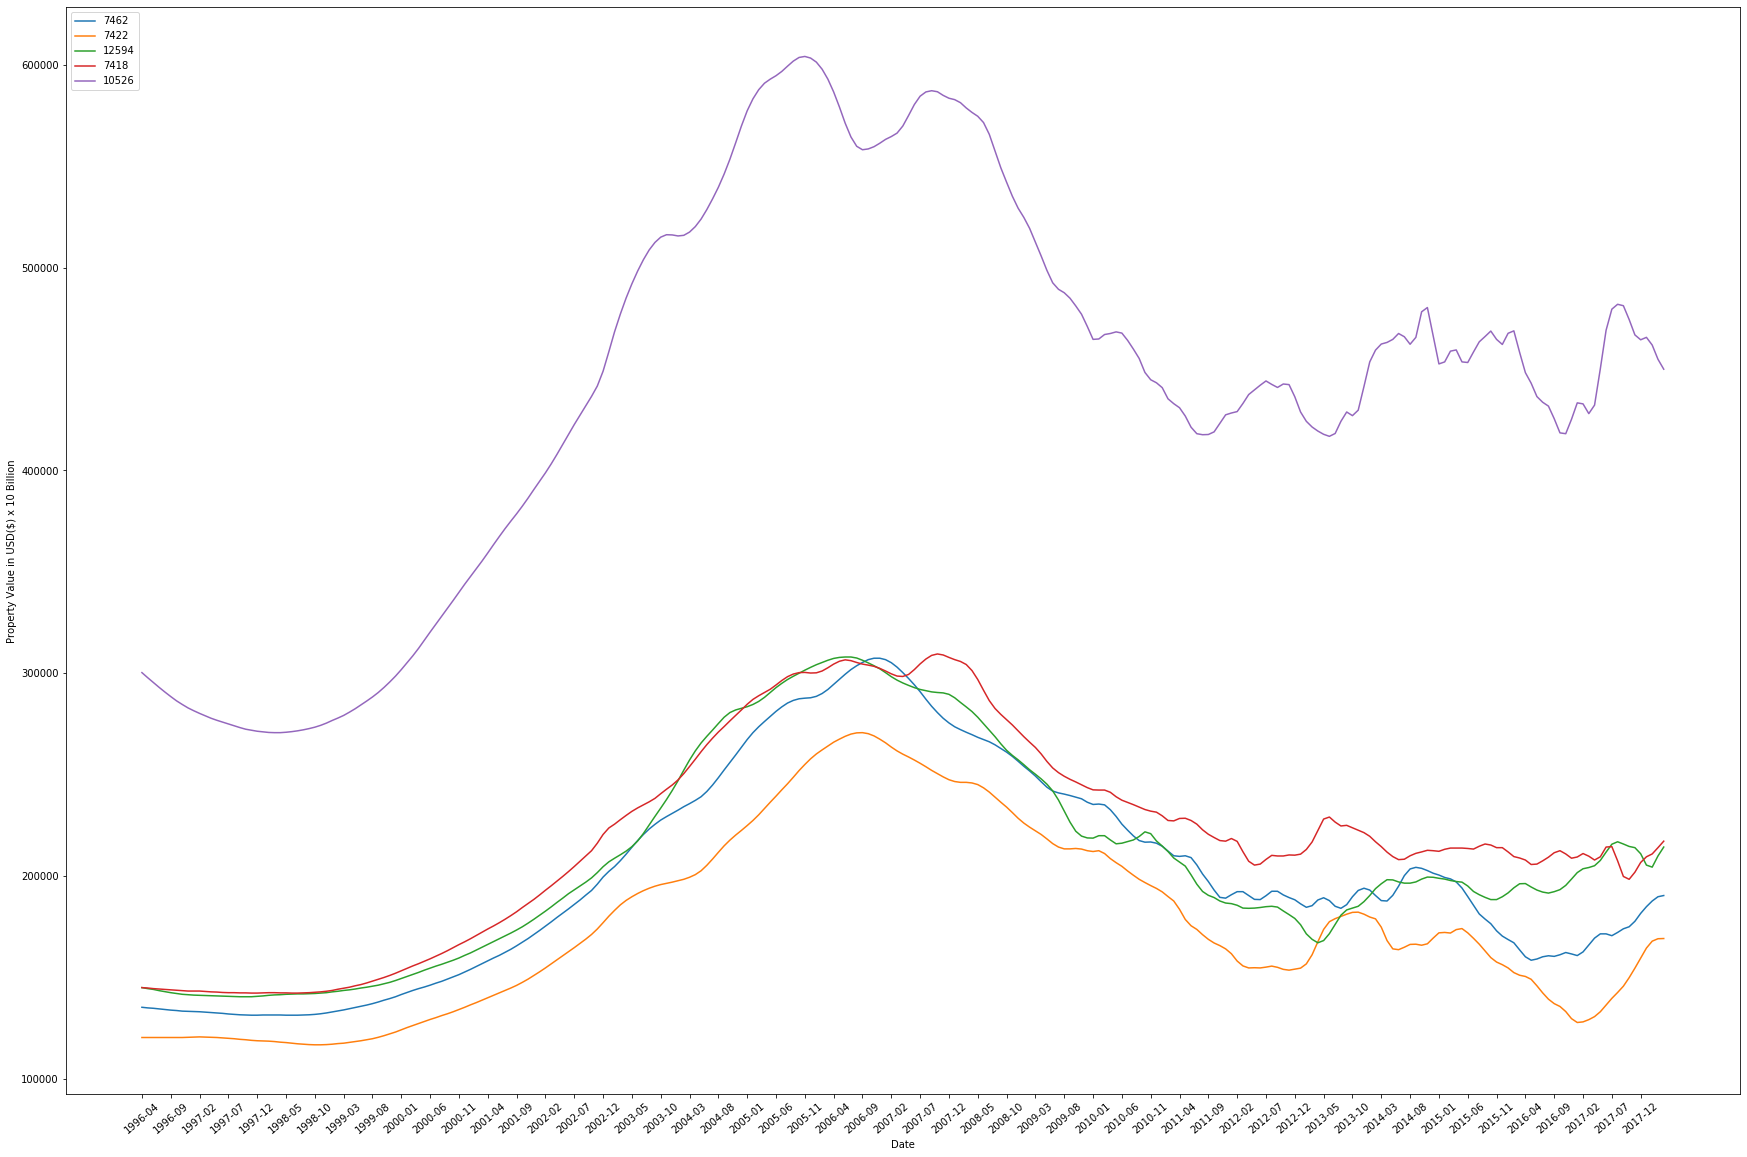

In [53]:
pot_df_96 = (pot_nyc_df_96.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']))
plt.figure(figsize=(30, 20))
plt.xlabel('Date')
plt.xticks(np.arange(0, 265, step=5), rotation=40)
plt.ylabel('Property Value in USD($)')
plt.plot(pot_df_96.T)
plt.legend(pot_nyc_df_96['RegionName'], loc='upper left')
plt.show()

## 3C: National + Proven
The same concept with our proven group in the NYC-Metro area applied nationally.

In [54]:
get_datetimes(df)

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [55]:
df.isnull().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

In [56]:
top_five_nat_df_1996 = []
for i in df:
    df_1996 = (df['2018-04'] - df['1996-04'])/ df['1996-04']
    top_five_nat_df_1996.append(df_1996)

df_1996.nlargest(5)

117     11.189940
1155    10.535523
475      9.942505
191      9.403061
106      8.941958
dtype: float64

In [57]:
top_five_nat_df_2005 = []
for i in df:
    df_2005 = (df['2018-04'] - df['2005-04'])/ df['2005-04']
    top_five_nat_df_2005.append(df_2005)

df_2005.nlargest(5)

6563    2.527619
475     2.492899
117     2.372871
1155    2.268325
156     2.166136
dtype: float64

In [58]:
top_five_nat_df_2014 = []
for i in df:
    df_2014 = (df['2018-04'] - df['2014-04'])/ df['2014-04']
    top_five_nat_df_2014.append(df_2014)

df_2014.nlargest(15)

13409    1.855159
842      1.790554
6563     1.338384
6105     1.253731
4554     1.233115
3325     1.200000
1754     1.187500
4712     1.183630
3794     1.174693
7302     1.164372
3832     1.147079
1835     1.133900
2347     1.125180
3188     1.124431
2522     1.121646
dtype: float64

In [61]:
top_nat_df = df[(df.SizeRank==13410) | (df.SizeRank==843) | (df.SizeRank==6564) | (df.SizeRank==6106) | (df.SizeRank==4555)]
top_nat_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
842,70817,30032,Candler-Mcafee,GA,Atlanta,Dekalb,843,NaN,NaN,NaN,...,103300,107700,111700,114600,118300,122300,125400,128600,132800,135900
4554,72830,33805,Lakeland,FL,Lakeland,Polk,4555,41900.0,41900.0,42000.0,...,85900,87800,89600,91800,94400,97000,99000,100400,101600,102500
6105,74241,37210,Nashville,TN,Nashville,Davidson,6106,60800.0,61000.0,61200.0,...,201200,204600,207700,211100,214500,217200,219300,221500,224300,226500
6563,63932,15201,Pittsburgh,PA,Pittsburgh,Allegheny,6564,34400.0,34600.0,34700.0,...,162300,164400,166100,167600,169000,170400,171400,173900,179700,185200
13409,69649,27980,Hertford,NC,Elizabeth City,Perquimans,13410,NaN,NaN,NaN,...,104200,106600,109900,114000,118100,122200,126600,130600,137300,143900


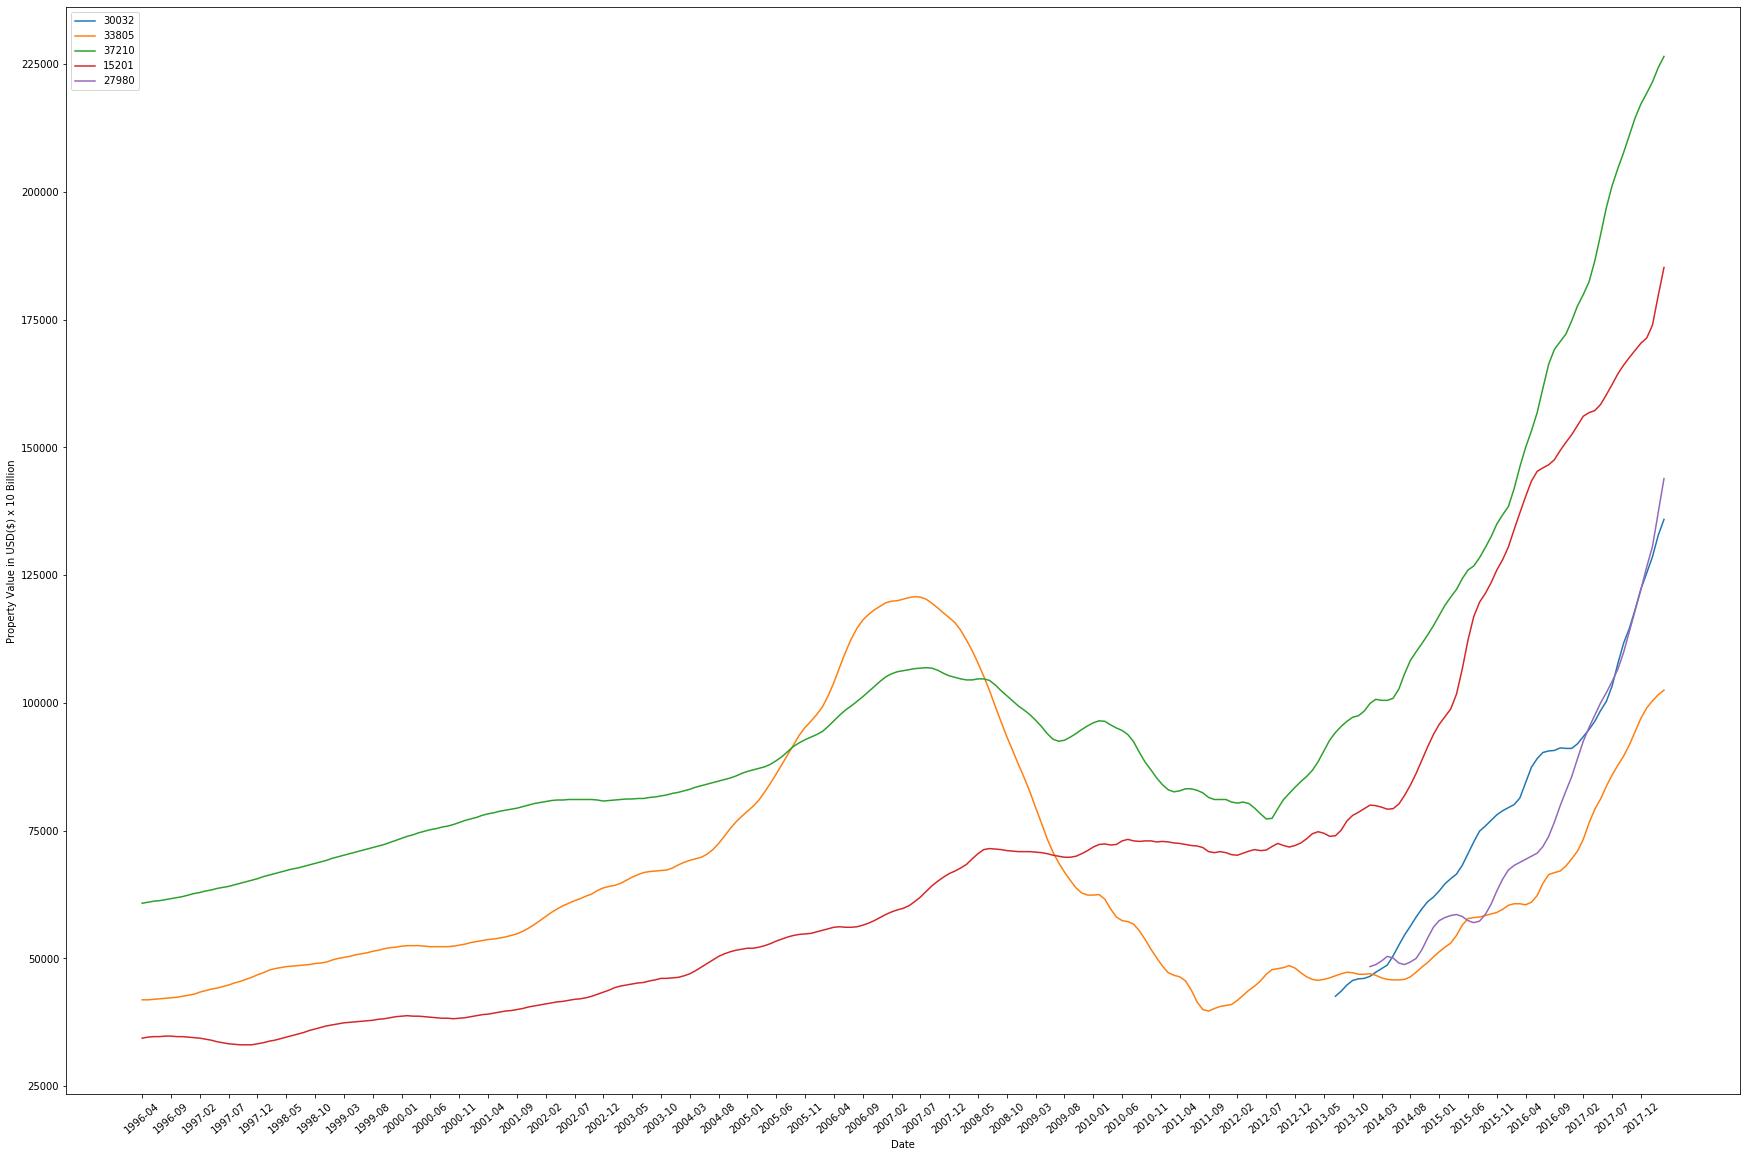

In [62]:
top_nat_slim_df = (top_nat_df.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']))
plt.figure(figsize=(30, 20))
plt.xlabel('Date')
plt.xticks(np.arange(0, 265, step=5), rotation=40)
plt.ylabel('Property Value in USD($)')
plt.plot(top_nat_slim_df.T)
plt.legend(top_nat_df['RegionName'], loc='upper left')
plt.show()

In [63]:
top_nat_df_96 = df[(df.SizeRank==118) | (df.SizeRank==1156) | (df.SizeRank==476) | (df.SizeRank==192) | (df.SizeRank==107)]
top_nat_df_96

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
106,62026,11215,New York,NY,New York,Kings,107,225700.0,227500.0,229400.0,...,2173600,2201100,2244400,2266100,2275800,2287100,2288900,2265300,2244900,2243900
117,62022,11211,New York,NY,New York,Kings,118,133200.0,132900.0,132500.0,...,1405100,1406400,1424700,1435300,1440500,1463100,1496100,1531100,1581900,1623700
191,60639,7302,Jersey City,NJ,New York,Hudson,192,137200.0,137800.0,138500.0,...,1340200,1372300,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300
475,62027,11216,New York,NY,New York,Kings,476,146100.0,146600.0,147200.0,...,1452000,1506100,1553100,1567700,1559700,1545700,1540200,1553600,1578400,1598700
1155,62033,11222,New York,NY,New York,Kings,1156,149200.0,148400.0,147500.0,...,1598000,1623800,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100


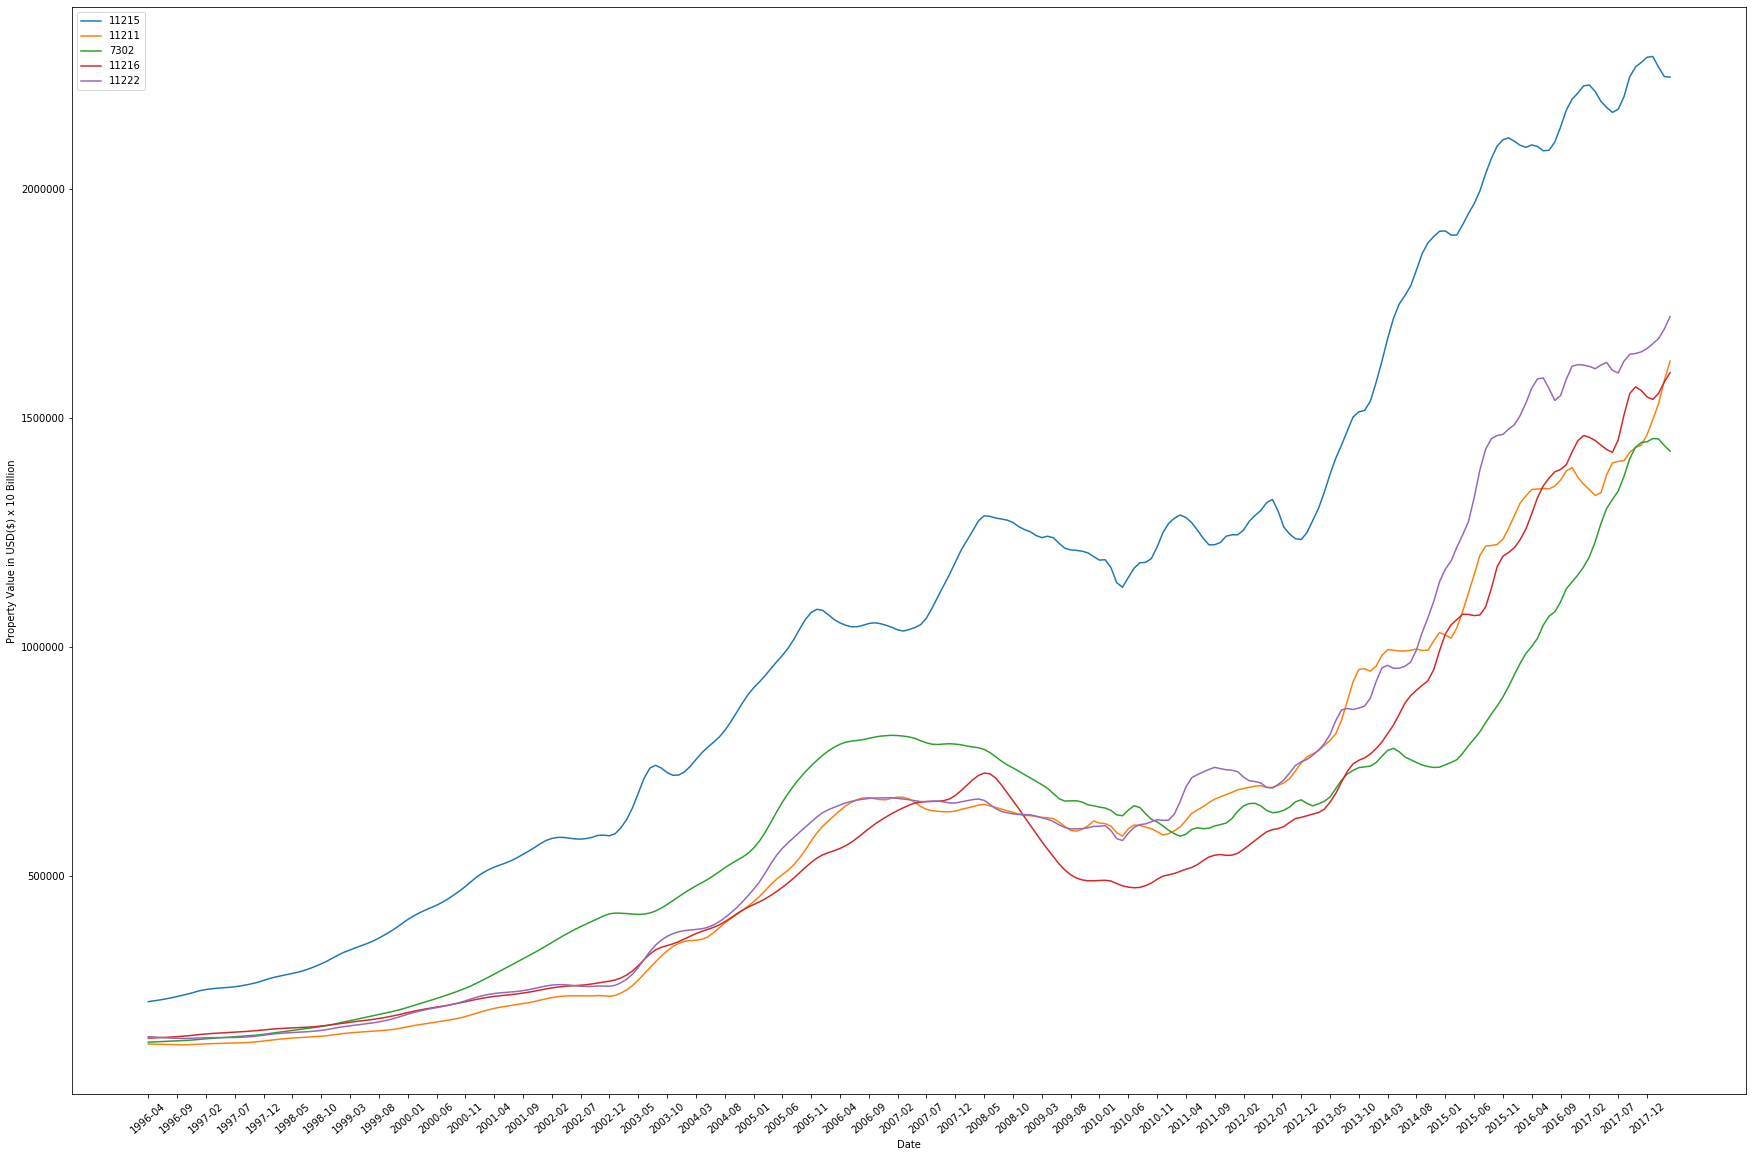

In [64]:
top_nat_slim_df_96 = (top_nat_df_96.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']))
plt.figure(figsize=(30, 20))
plt.xlabel('Date')
plt.xticks(np.arange(0, 265, step=5), rotation=40)
plt.ylabel('Property Value in USD($) x 10 Billion')
plt.plot(top_nat_slim_df_96.T)
plt.legend(top_nat_df_96['RegionName'], loc='upper left')
plt.show()

## 3D. National + Potential
The same concept with our potential group in the NYC-Metro area applied nationally.

In [65]:
df_1996.nsmallest(5)

4149    -0.532609
4381    -0.515924
5068    -0.375469
7402    -0.328704
13845   -0.327154
dtype: float64

In [66]:
df_2005.nsmallest(5)

4149   -0.676692
4381   -0.655068
5278   -0.480181
876    -0.450194
4142   -0.446298
dtype: float64

In [67]:
df_2014.nsmallest(15)

12436   -0.309129
13485   -0.252874
7435    -0.241877
8474    -0.233333
4294    -0.221182
5690    -0.220648
7815    -0.217320
9558    -0.213359
14300   -0.187500
11355   -0.178378
5489    -0.177620
6745    -0.166667
4464    -0.161392
5522    -0.161220
14387   -0.156368
dtype: float64

In [68]:
pot_nat_df = df[(df.SizeRank==12437) | (df.SizeRank==13486) | (df.SizeRank==7436) | (df.SizeRank==8475) | (df.SizeRank==4295)]
pot_nat_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
4294,77592,45331,Greenville,OH,Greenville,Darke,4295,NaN,NaN,NaN,...,122600,122900,123500,123400,121700,119600,118600,115800,111200,108100
7435,69622,27944,Hertford,NC,Elizabeth City,Perquimans,7436,NaN,NaN,NaN,...,149400,150100,153900,156100,152900,146400,140600,139300,143600,147000
8474,75337,39530,Biloxi,MS,Gulfport,Harrison,8475,NaN,NaN,NaN,...,74600,76400,77600,78100,77600,76700,76500,76600,76100,75900
12436,77643,45390,Union City,OH,Greenville,Darke,12437,NaN,NaN,NaN,...,72600,72400,72500,72600,72100,71500,71100,69700,67700,66600
13485,77607,45346,New Madison,OH,Greenville,Darke,13486,NaN,NaN,NaN,...,102600,103400,103900,104000,102500,100600,100000,98200,94100,91000


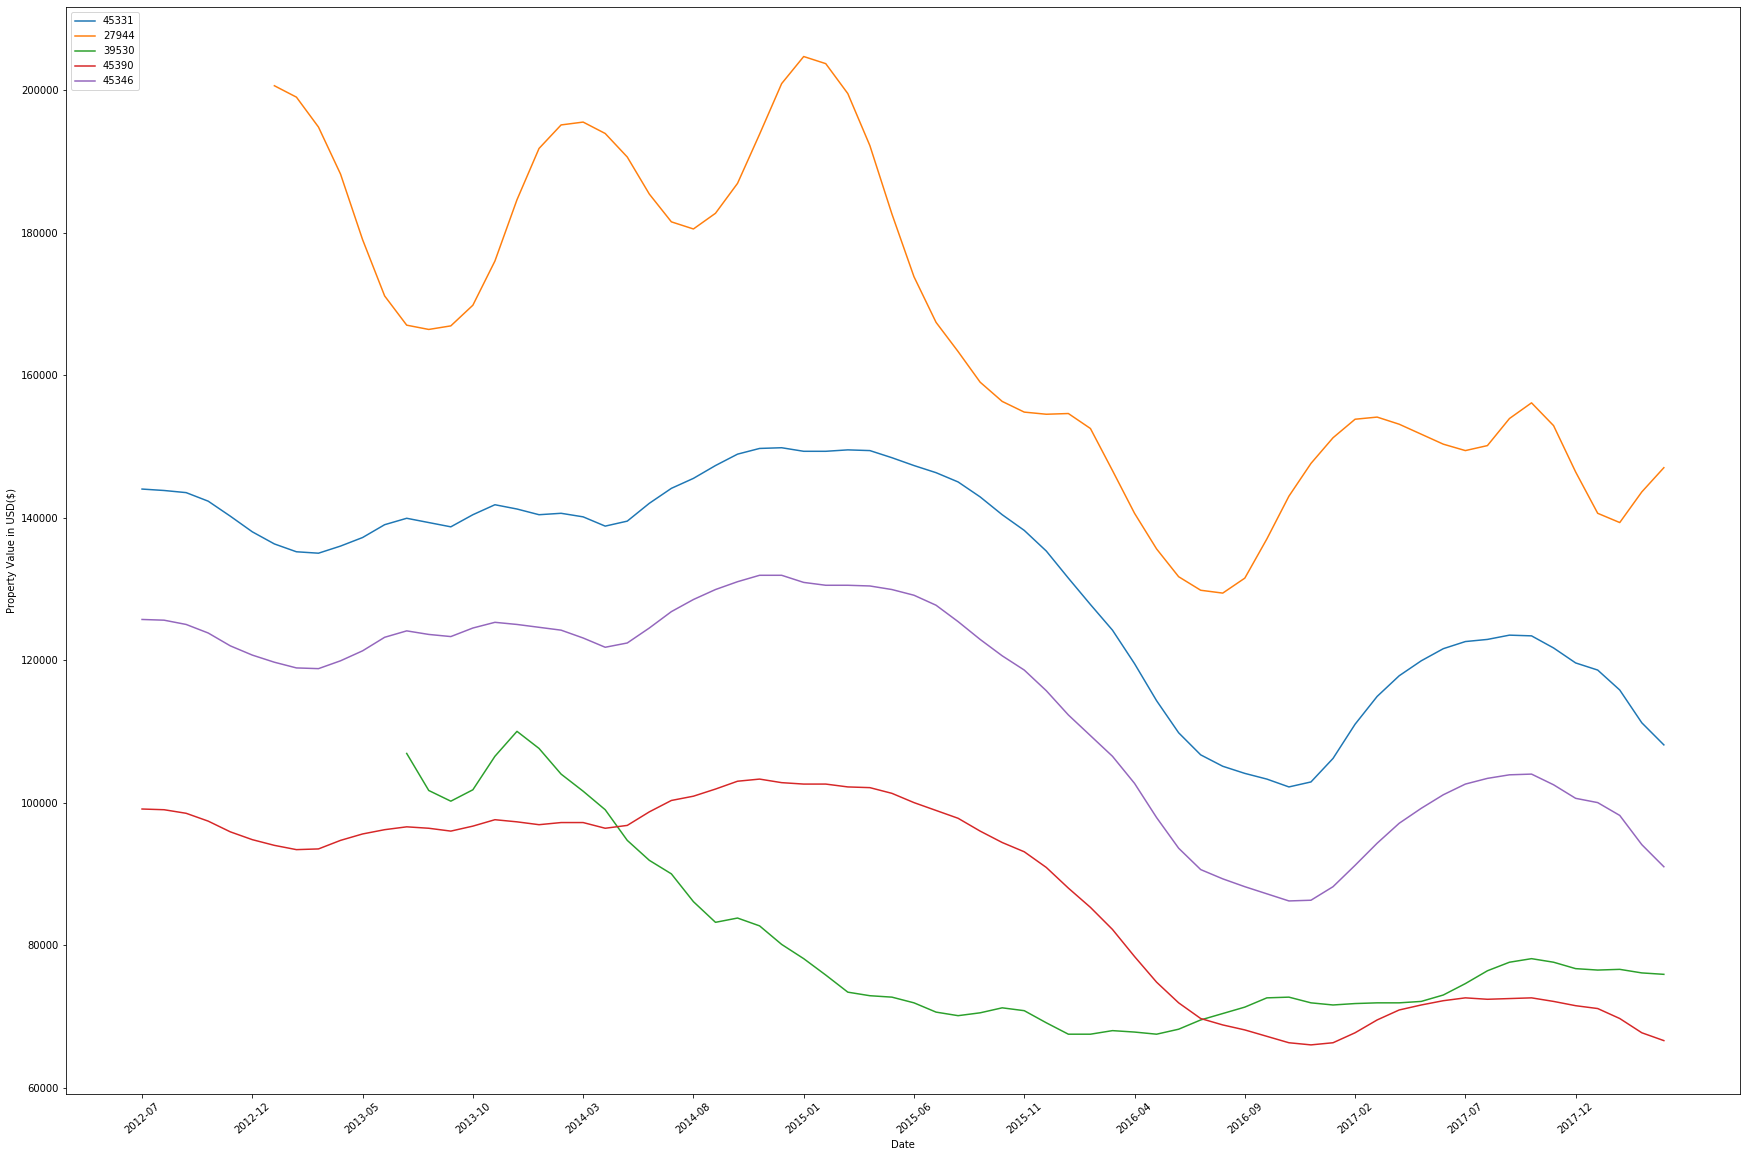

In [70]:
pot_nat_slim_df = (pot_nat_df.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']))
plt.figure(figsize=(30, 20))
plt.xlabel('Date')
plt.xticks(np.arange(0, 265, step=5), rotation=40)
plt.ylabel('Property Value in USD($)')
plt.plot(pot_nat_slim_df.T)
plt.legend(pot_nat_df['RegionName'], loc='upper left')
plt.show()

In [72]:
pot_nat_df_96 = df[(df.SizeRank==4150) | (df.SizeRank==4382) | (df.SizeRank==5069) | (df.SizeRank==7403) | (df.SizeRank==13846)]
pot_nat_df_96

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
4149,79247,48506,Flint,MI,Flint,Genesee,4150,46000.0,46400.0,46800.0,...,20900,21200,21800,22100,22200,22200,21600,21200,21300,21500
4381,79244,48503,Flint,MI,Flint,Genesee,4382,47100.0,47200.0,47400.0,...,18200,18900,19700,20600,21000,20800,20500,20800,21700,22800
5068,92646,78735,Austin,TX,Austin,Travis,5069,772100.0,765800.0,760200.0,...,471500,471200,471900,473300,473600,473200,473500,475500,479300,482200
7402,64354,15902,Johnstown,PA,Johnstown,Cambria,7403,43200.0,43200.0,43300.0,...,28900,28500,28100,27900,27800,27600,27600,27700,28300,29000
13845,84758,61012,Capron,IL,Rockford,Boone,13846,183400.0,181400.0,179300.0,...,128400,127400,127700,127600,126600,126000,125700,124900,124000,123400


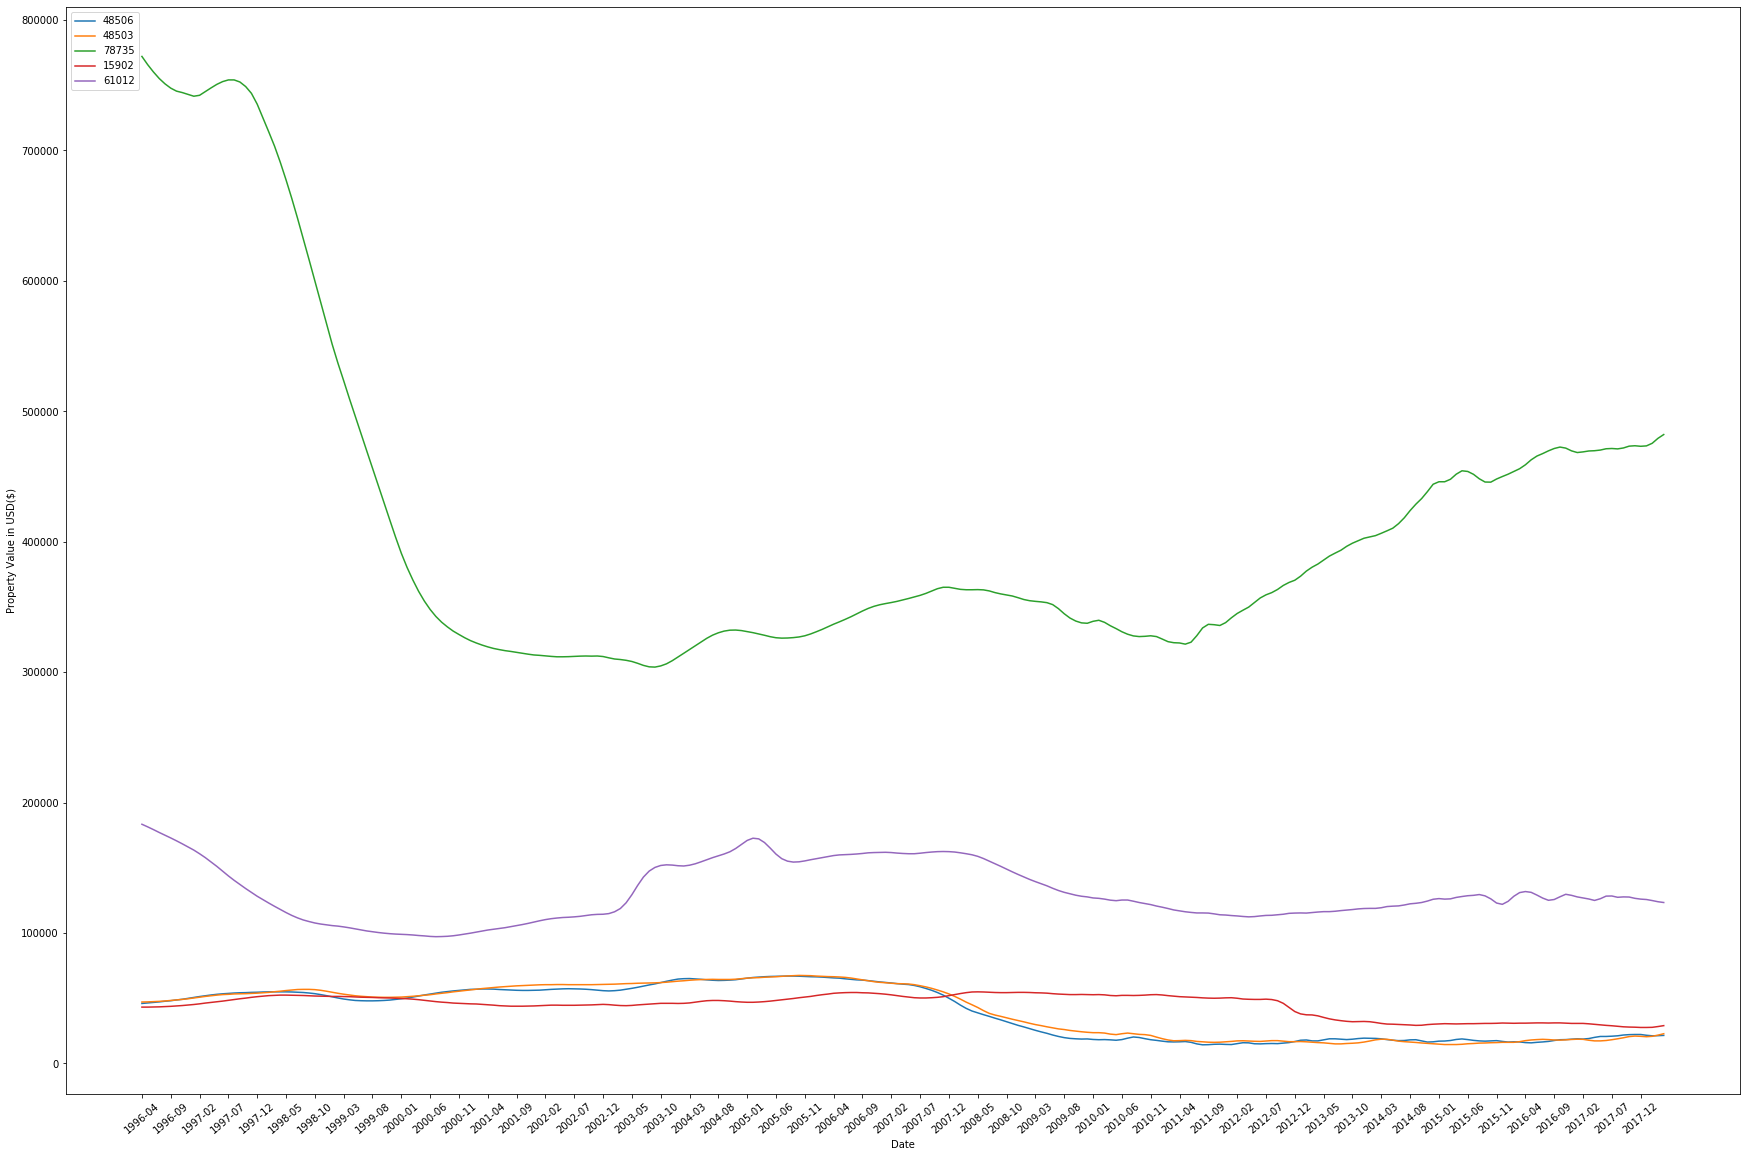

In [73]:
pot_nat_slim_df_96 = (pot_nat_df_96.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']))
plt.figure(figsize=(30, 20))
plt.xlabel('Date')
plt.xticks(np.arange(0, 265, step=5), rotation=40)
plt.ylabel('Property Value in USD($)')
plt.plot(pot_nat_slim_df_96.T)
plt.legend(pot_nat_df_96['RegionName'], loc='upper left')
plt.show()

# Step 4: Reshape from Wide to Long Format

In [10]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True, errors='coerce')
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

# Step 5: ARIMA Modeling

In [ ]:
series = pd.Series(TS, index=dates)
series.plot(figsize=(14,6), linewidth=2, fontsize=14)

In [74]:
def stationarity_check(ts, wd = 8):
   
    rolmean = ts.rolling(window =wd, center = False).mean()
    rolstd = ts.rolling(window = wd, center = False).std()
    fig = plt.figure(figsize = (12, 6))
    orig = plt.plot(ts, color ='blue', label = 'Original')
    mean = plt.plot(rolmean, color ='red', label ='Rolling Mean')
    std = plt.plot(rolstd, color ='black', label ='Rolling Std')
    plt.legend(loc ='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index =['Test Statistic',
                                             'p-value',
                                             '#Lags Used',
                                             'Number of observation'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    return(dfoutput)

In [78]:
for i in range(len(df.RegionName.unique())):
    ts = df[i][1].squeeze()
    print('Stationarity check for',labels[i],'\n')

    out1 = stationarity_check(ts, wd = 3)
    print(out1)
    print('\n')

    fig,ax = plt.subplots(figsize = (20,5))
    plt.show()

KeyError: 0

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 1
p = d = q = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p,d,q))

# Generate all different combinations of seasonal p, q and q triplets (use 12 for frequency)
pdqs = [(x[0],x[1],x[2],12) for x in pdq]

In [ ]:
for i in range(len(zipcodes)):
    series = timeseries[i][1]
    ans=[]
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(series,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                output = mod.fit()
                ans.append([comb, combs, output.aic, output.bic])

            except:
                continue
    arima_results.append(ans)

In [ ]:
minAICs =[]
for i in range(len(arima_results)):
    ans_df = pd.DataFrame(arima_results[i], columns =['pdq', 'pdqs','aic','bic'])
    minAICs.append(ans_df.loc[ans_df['aic'].idxmin()])

In [ ]:
outputs =[]
for i in range(len(minAICs)):
    series = timeseries[i][1]
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(series,
                                    order=minAICs[i]['pdq'],
                                    seasonal_order= minAICs[i]['pdqs'],
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
    # Fit the model and print results
    output = ARIMA_MODEL.fit()
    
    print(titles[i])
    print('Non-seasonal parameters (p,d,q):', minAICs[i]['pdq'])
    print('Seasonal parameters and periodicity (P,D,Q,s):', minAICs[i]['pdqs'])
    print('AIC:', minAICs[i]['aic'])
    print('BIC:', minAICs[i]['bic'])
    print(output.summary().tables[1])
    output.plot_diagnostics(figsize=(15,18))
    plt.show()
    outputs.append(output)
    print('\n')

# Step 6: One-Step Forecasting

In [ ]:
predictions =[]
for output in outputs:
    prediction = output.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic = False)
    pred_conf = prediction.conf_int()
    predictions.append((prediction,pred_conf))

In [ ]:
for i, prediction in enumerate(predictions): 
    series = timeseries[i][1]
    # Get the Real and predicted values
    series_forecasted = prediction[0].predicted_mean
    series_truth = series['2017-01-01':].squeeze()

    # series_truth.squeeze()
    # Compute the mean square error
    rmse = np.sqrt(((series_forecasted-series_truth)**2).mean())

    print(titles[i],'\n')
    print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))
    print('The root mean squared error'.title()
          + ' of our forcase is '
          +'{}% of mean housing price from 2017.'.format(round(rmse/series_truth.mean()*100,3)))

    
    # Plot real vs predicted values along with confidence interval
    rcParams['figure.figsize']=15,6
    # Plot observed values
    ax = series['2016':].plot(label ='observed')
    # Plot predicted values
    prediction[0].predicted_mean.plot(ax= ax, label ='One-step ahead Forecast', alpha =0.9)
    # Plot the range for confidence intervals
    ax.fill_between(prediction[1].index,
                   prediction[1].iloc[:,0],
                   prediction[1].iloc[:,1], color='g', alpha=0.5)
    # Set axes labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Housing prices')
    ax.set_title(titles[i])
    plt.legend()

    plt.show()

# Step 7: Dynamic Forecasting

In [ ]:
pred_dynamics =[]
for output in outputs:
    pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=True, full_results=True)
    pred_dynamic_conf = pred_dynamic.conf_int()
    pred_dynamics.append((pred_dynamic, pred_dynamic_conf))

In [ ]:
for i , pred_dynamic in enumerate(pred_dynamics):
    series = timeseries[i][1]
    
    
    
    # Get the Real and predicted values
    series_forecasted = pred_dynamic[0].predicted_mean
    series_truth = series['2017-01-01':].squeeze()

    # series_truth.squeeze()
    # Compute the mean square error
    rmse = np.sqrt(((series_forecasted-series_truth)**2).mean())

    print(titles[i],'\n')
    print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))
    print('The root mean squared error'.title()
          + 'of our forcase is'
          +'{}% of mean housing price from 2017.'.format(round(rmse/series_truth.mean()*100,3)))
    # The Mean Squared Error of our forecasts is 0.07
    
    
    ax = series['2015':].plot(label='observed', figsize=(20, 15))
    pred_dynamic[0].predicted_mean.plot(label='Dynamic Forecast', ax=ax)

    ax.fill_between(pred_dynamic[1].index,
                    pred_dynamic[1].iloc[:, 0],
                    pred_dynamic[1].iloc[:, 1], color='g', alpha=.3)

    ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-01'), series_forecasted.index[-1], alpha=.1, zorder=-1)

    ax.set_xlabel('Date')
    ax.set_ylabel('Housing Price')
    ax.set_title(titles[i])
    plt.legend()
    plt.show()

# Step 8: Interpreting Results (Actual v. Predicted)

In [ ]:
profits =[]
compare = []
for i, prediction in enumerate(forecasts):
   
    actual =  timeseries[i][1]['2018-04'].values[0][0] 
    future = prediction[0].predicted_mean['2021-04'].values[0]
    limits = prediction[1]['2020-04'].values[0]
    
    profit = future-actual
    compare.append(((i,titles[i]),round(profit,0),round(profit/actual*100,0), actual, future, limits))
    
    #sorting the profit margins by the relative quantities (% increase)
    compare_sorted_rel = sorted(compare, key = lambda x:x[2], reverse = True)

In [ ]:
topbar =[]
bottombar =[]
yerrs =[]
xs =[]
label =[]
for i in range(len(compare_sorted_rel)):
    topbar.append(round(compare_sorted_rel[i][4],0))
    bottombar.append(round(compare_sorted_rel[i][3],0))
    yerrs.append(round(compare_sorted_rel[i][-1][1]- compare_sorted_rel[i][-2],0))
    idx = compare_sorted_rel[i][0][0]
    label.append(str(compare_sorted_rel[i][2])[:-2]+'%')
    xs.append(str(timeseries[idx][0].RegionName.values[0]))

In [ ]:
plt.style.use('seaborn')
fig = plt.figure(figsize =(20,8))
x = range(1,len(topbar)+1)
plt.bar(x,topbar,yerr=yerrs, color = "red", label ='April 2021')
plt.bar(x, bottombar, color = "blue", label ='April 2018')

for i in range(len(label)):
    plt.text(x=x[i]+0.1,y=topbar[i]+500000, s=label[i],fontsize = 18)

plt.gcf().autofmt_xdate()
plt.legend(fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ticklabel_format(style ='plain')
plt.title('Comparisons between actual price in April 2018 and predicted price in April 2021', fontsize=20)
plt.gcf().autofmt_xdate()

In [ ]:
for i in range(len(compare_sorted_rel)):
    print(compare_sorted_rel[i][0][1], '\t',label[i])